In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [2]:
df = pd.read_csv('Data Sets/CarPrice.csv')
df.head(71)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,67,0,mazda rx-7 gs,diesel,std,four,sedan,rwd,front,104.9,...,134,idi,3.43,3.64,22.0,72,4200,31,39,18344.0
67,68,-1,buick electra 225 custom,diesel,turbo,four,sedan,rwd,front,110.0,...,183,idi,3.58,3.64,21.5,123,4350,22,25,25552.0
68,69,-1,buick century luxus (sw),diesel,turbo,four,wagon,rwd,front,110.0,...,183,idi,3.58,3.64,21.5,123,4350,22,25,28248.0
69,70,0,buick century,diesel,turbo,two,hardtop,rwd,front,106.7,...,183,idi,3.58,3.64,21.5,123,4350,22,25,28176.0


In [3]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


### Dorped the enginelocation because it has only 3 rare location, rest contains front

In [4]:
df.drop('enginelocation', axis = 1, inplace = True)
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Data Visualisation

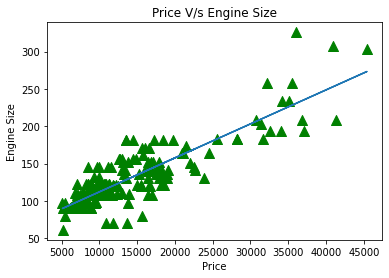

In [5]:
plt.title('Price V/s Engine Size')
plt.scatter(x = df.price, y = df.enginesize, marker = '^', c = 'g', s = 100)
m, b = np.polyfit(df.price, df.enginesize, 1)
plt.plot(df.price, df.price * m + b)
plt.xlabel('Price')
plt.ylabel('Engine Size')
plt.show()

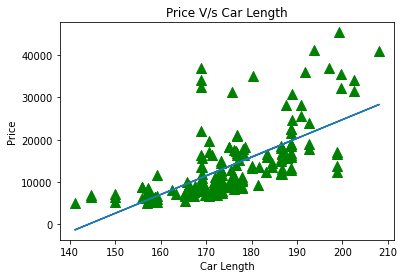

In [6]:
plt.title('Price V/s Car Length')
plt.scatter(x = df.carlength, y = df.price, marker = '^', c = 'g', s = 100)
m, b = np.polyfit(df.carlength, df.price, 1)
plt.plot(df.carlength, m * df.carlength + b)
plt.xlabel('Car Length')
plt.ylabel('Price')
plt.show()

<BarContainer object of 205 artists>

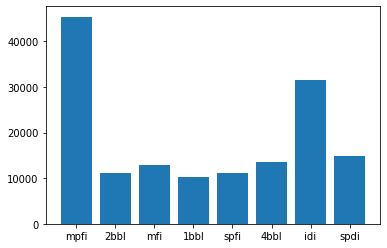

In [7]:
plt.bar(df.fuelsystem, df.price)

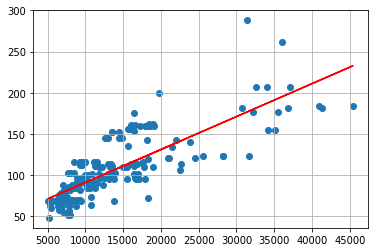

In [8]:
plt.scatter(df.price, df.horsepower)
m, b = np.polyfit(df.price, df.horsepower, 1)
plt.plot(df.price, df.price * m + b, c = 'r')
plt.grid()
plt.show()

In [9]:
df.enginetype.value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [10]:
df.fuelsystem.value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

In [11]:
oe = OrdinalEncoder()
df.fueltype = oe.fit_transform(df[['fueltype']]) # 0 = diesel || 1 = gas

In [12]:
df.doornumber = oe.fit_transform(df[['doornumber']]) # 1 = two || 0 = four

In [13]:
df.drop(['CarName', 'aspiration'], axis = 1, inplace = True)

In [14]:
df[['carbody']].head(10)

,carbody
0,convertible
1,convertible
2,hatchback
3,sedan
4,sedan
5,sedan
6,sedan
7,wagon
8,sedan
9,hatchback


In [15]:
df.carbody.unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [16]:
ohe = OneHotEncoder(drop = 'first')
carbody_n = ohe.fit_transform(df[['carbody']]).toarray() # 0, 0, 0, 0 ==> Convertible
df_n = pd.DataFrame(carbody_n, columns = ['HardTop', 'Hatchback', 'Sedan', 'Wagon'])
df_n.head(70)

,HardTop,Hatchback,Sedan,Wagon
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
65,0.0,0.0,1.0,0.0
66,0.0,0.0,1.0,0.0
67,0.0,0.0,1.0,0.0
68,0.0,0.0,0.0,1.0


In [17]:
data_n = pd.concat([df_n, df], axis = 1)

In [18]:
data_n.drop('carbody', axis = 1, inplace = True)

In [19]:
data_n.head()

,HardTop,Hatchback,Sedan,Wagon,car_ID,symboling,fueltype,doornumber,drivewheel,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0.0,0.0,0.0,0.0,1,3,1.0,1.0,rwd,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,0.0,0.0,0.0,0.0,2,3,1.0,1.0,rwd,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,0.0,1.0,0.0,0.0,3,1,1.0,1.0,rwd,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,0.0,0.0,1.0,0.0,4,2,1.0,0.0,fwd,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,0.0,0.0,1.0,0.0,5,2,1.0,0.0,4wd,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Droping drivewheel & fuelsystem because I didn't know what it is😂😂

In [20]:
data_n.drop(['drivewheel', 'enginetype', 'fuelsystem'], axis = 1, inplace = True)

<BarContainer object of 205 artists>

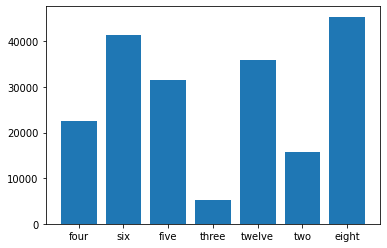

In [21]:
plt.bar(data_n.cylindernumber, data_n.price)

In [22]:
data_n.drop('cylindernumber', axis = 1, inplace = True)

# Splitting train and testing data

In [23]:
features = data_n.drop(df[['price']], axis = 1)
target = data_n.price

In [24]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2)

In [25]:
X_train.head()

,HardTop,Hatchback,Sedan,Wagon,car_ID,symboling,fueltype,doornumber,wheelbase,carlength,...,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
143,0.0,0.0,1.0,0.0,144,0,1.0,0.0,97.2,172.0,...,52.5,2340,108,3.62,2.64,9.0,94,5200,26,32
92,0.0,0.0,1.0,0.0,93,1,1.0,0.0,94.5,165.3,...,54.5,1938,97,3.15,3.29,9.4,69,5200,31,37
100,0.0,0.0,1.0,0.0,101,0,1.0,0.0,97.2,173.4,...,54.7,2302,120,3.33,3.47,8.5,97,5200,27,34
163,0.0,0.0,1.0,0.0,164,1,1.0,1.0,94.5,168.7,...,52.6,2169,98,3.19,3.03,9.0,70,4800,29,34
94,0.0,0.0,1.0,0.0,95,1,1.0,1.0,94.5,165.3,...,54.5,1951,97,3.15,3.29,9.4,69,5200,31,37


In [26]:
X_test.head()

,HardTop,Hatchback,Sedan,Wagon,car_ID,symboling,fueltype,doornumber,wheelbase,carlength,...,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
151,0.0,1.0,0.0,0.0,152,1,1.0,1.0,95.7,158.7,...,54.5,2040,92,3.05,3.030,9.0,62,4800,31,38
200,0.0,0.0,1.0,0.0,201,-1,1.0,0.0,109.1,188.8,...,55.5,2952,141,3.78,3.150,9.5,114,5400,23,28
85,0.0,0.0,1.0,0.0,86,1,1.0,0.0,96.3,172.4,...,51.6,2365,122,3.35,3.460,8.5,88,5000,25,32
58,0.0,1.0,0.0,0.0,59,3,1.0,1.0,95.3,169.0,...,49.6,2500,80,3.33,3.255,9.4,135,6000,16,23
155,0.0,0.0,0.0,1.0,156,0,1.0,0.0,95.7,169.7,...,59.1,3110,92,3.05,3.030,9.0,62,4800,27,32


In [27]:
len(X_train)

164

In [28]:
len(y_test)

41

In [29]:
y_train.head()

143    9960.0
92     6849.0
100    9549.0
163    8058.0
94     7299.0
Name: price, dtype: float64

In [30]:
y_test.head()

151     6338.0
200    16845.0
85      6989.0
58     15645.0
155     8778.0
Name: price, dtype: float64

# Importing Linear Regression Model

In [31]:
model = LinearRegression()

In [32]:
model.fit(X_train, y_train)

LinearRegression()

In [33]:
model.score(X_train, y_train) * 100

87.8112246165208

In [34]:
result = model.predict(X_test)

In [35]:
len(result)

41

In [36]:
for i in result:
    print(i)

5012.625073147268
16713.97355097375
10216.048852714528
10861.463332935054
6206.021529286467
19955.337817782427
14797.20711091123
18883.505205566056
7613.00964628996
28173.090335976325
15765.080532187138
15629.668557826037
9801.992751457568
11554.939146795608
47266.839361250204
6814.069547518782
30964.862500857773
21985.595797682305
8685.196412009762
7729.101053222716
17523.921240778174
5894.781359905057
18708.735791204344
10258.467272146227
6881.02670344698
7338.054983224974
9848.77372563928
9350.496096751762
8267.405994638917
10469.35948144392
6982.527071475757
5197.0288203062955
18866.327396936285
26075.728589231156
7045.72903757044
14468.509706899313
6893.886302174316
8818.748743407741
18742.842568452288
7014.939579447448
26746.692619356945


# Plotting Result

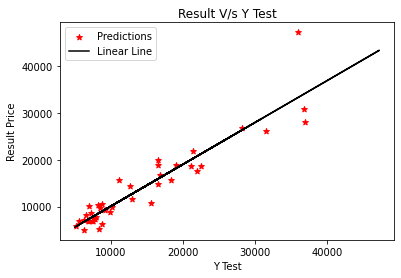

In [37]:
plt.scatter(x = y_test, y = result, label = 'Predictions', marker='*', c='red')
plt.title('Result V/s Y Test')
plt.xlabel('Y Test')
plt.ylabel('Result Price')
m, b = np.polyfit(y_test, result, 1)
plt.plot(result, result * m + b, label = 'Linear Line', c = 'black')
plt.legend()
plt.show()